<a href="https://colab.research.google.com/github/dheayutari/Decission-Tree_Big-Data/blob/main/ANN_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [5]:
import numpy as np # Mengimpor library NumPy
import pandas as pd # Mengimpor library pandas
import matplotlib.pyplot as plt # Mengimpor modul pyplot untuk visualisasi data
import seaborn as sns # Mengimpor library seaborn
from sklearn.model_selection import train_test_split #Mengimpor fungsi train_test_split dari modul model_selection untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.preprocessing import MinMaxScaler #Mengimpor kelas MinMaxScaler dari modul preprocessing untuk menskalaan fitur
from tensorflow.keras.models import Sequential # Mengimpor kelas Sequential dari modul models untuk membuat model ANN
from tensorflow.keras.layers import Dense # Mengimpor kelas Dense dari modul layers untuk menambahkan layer-layer ke dalam model ANN
from sklearn.linear_model import LinearRegression # Mengimpor kelas LinearRegression dari modul linear_model untuk membangun model regresi linear
from sklearn.metrics import r2_score # Mengimpor fungsi r2_score dari metrics untuk mengukur kinerja model

**Import Data Input**

In [7]:
# Membaca file CSV yang berisi data pembayaran mobil dan dimuat ke dalam DataFrame pandas df
df = pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


**Preprocessing**

In [8]:
# Menghapus kolom-kolom yang tidak diperlukan di DataFrame
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

**Menampilkan Data**

In [9]:
# Menampilkan lima baris pertama dari DataFrame
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


**Informasi Data**

In [10]:
# Memberikan ringkasan informasi tentang DataFrame
df.info()
# Menghitung jumlah nilai yang hilang di setiap kolom DataFrame
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

**Visualisasi**

Text(0.5, 1.0, 'The Corr Between Credit Card And Annual Salary')

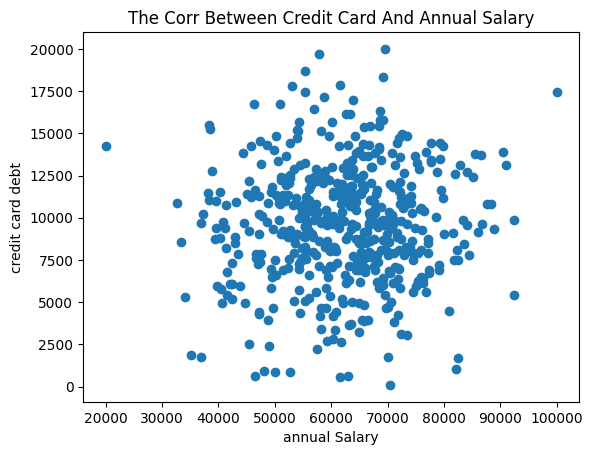

In [11]:
# Membuat visualisasi dengan menggunakan scatter plot dan pairplot untuk mengeksplorasi hubungan antara variabel-variabel di DataFrame
plt.scatter(df['annual Salary'], df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('The Corr Between Credit Card And Annual Salary')

**Plot**

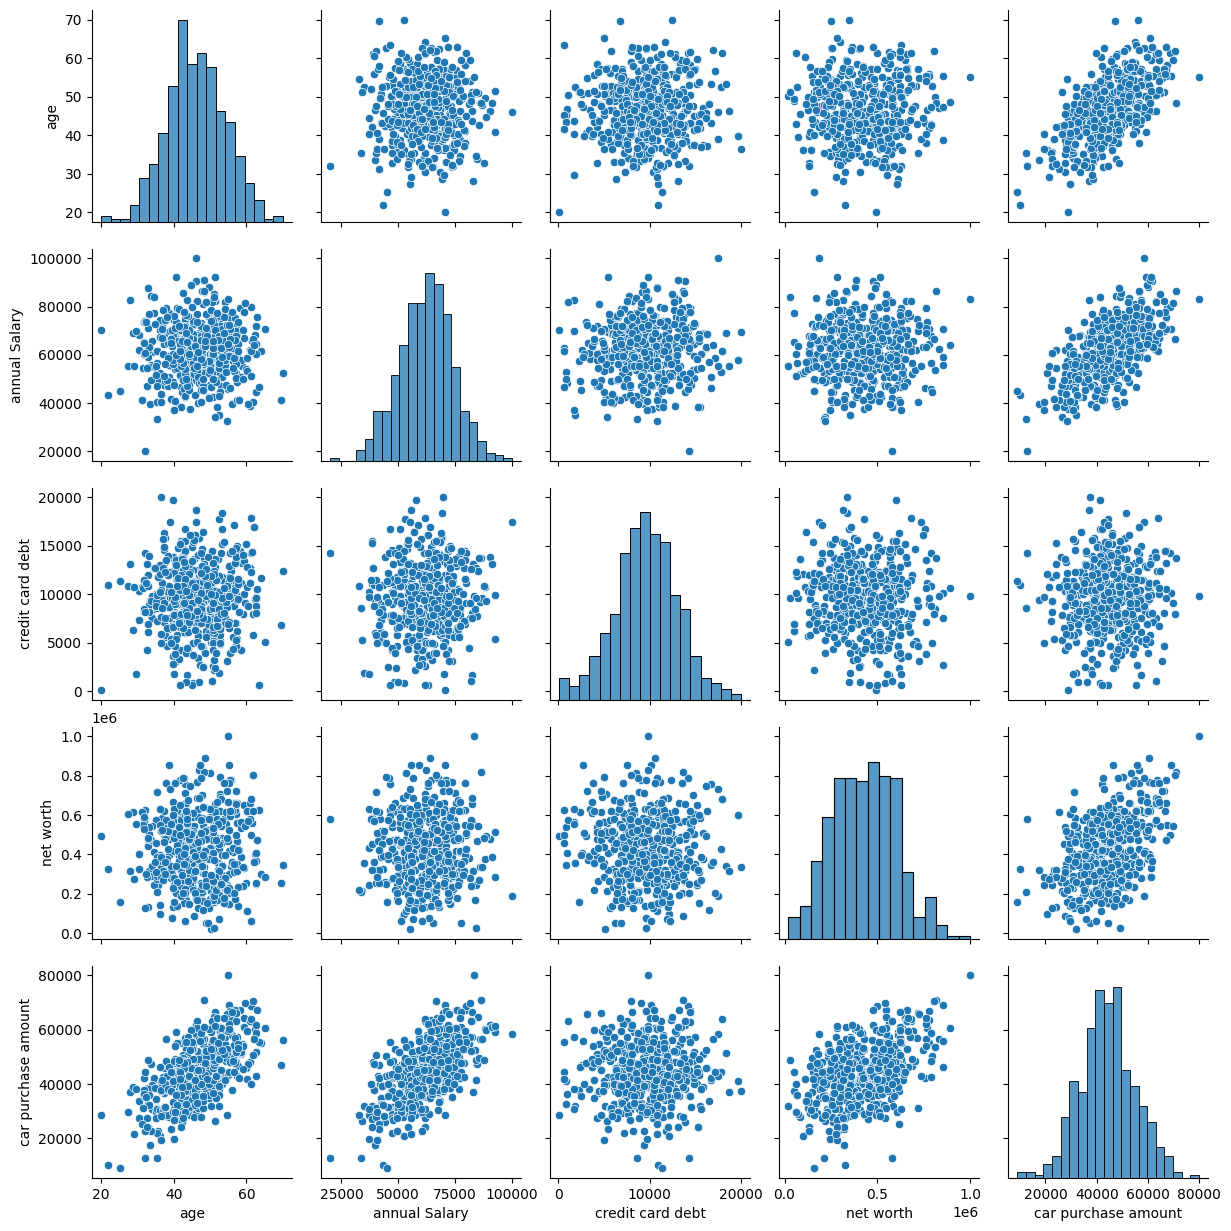

In [12]:
# Membuat matriks scatter plot dari pasangan variabel di DataFrame
sns.pairplot(df)

**Data Splitting**

In [13]:
# Memisahkan data menjadi fitur (X) dan target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

**Preprocessing**

In [14]:
# Menyesuaikan skala fitur menggunakan MinMaxScaler dan membagi data menjadi set pelatihan dan pengujian
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Linear Regression**

In [16]:
# Membuat model regresi linear
lreg = LinearRegression()
# Melatih dengan data pelatihan
lreg.fit(X_train, y_train)
# Mencetak skor R2 untuk set pelatihan dan pengujian
print('Train Score', lreg.score(X_train, y_train))
print('Test Score', lreg.score(X_test, y_test))

Train Score 0.9999999816502594
Test Score 0.9999999791890545


**Prediksi Data**

In [17]:
# Menyimpan nilai yang diprediksi
y_pred = lreg.predict(X_test)

**ANN Model**

In [18]:
# Membuat model ANN
ann = Sequential([Dense(32, activation="relu"),
                  Dense(1, activation='linear')])

# Di-compile dengan optimizer dan fungsi loss
ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])

# Dilatih dengan data pelatihan (train)
history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 28ms/step - loss: 0.5493 - mean_absolute_error: 0.7166 - val_loss: 0.5331 - val_mean_absolute_error: 0.7041
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.4215 - mean_absolute_error: 0.6243 - val_loss: 0.4091 - val_mean_absolute_error: 0.6131
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.3183 - mean_absolute_error: 0.5381 - val_loss: 0.3081 - val_mean_absolute_error: 0.5279
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2322 - mean_absolute_error: 0.4554 - val_loss: 0.2248 - val_mean_absolute_error: 0.4467
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1617 - mean_absolute_error: 0.3730 - val_loss: 0.1523 - val_mean_absolute_error: 0.3612
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1023 - mean_absolute_error: 0.2883 - val_loss: 0.0926 - val_mean_absolute_error: 0.2729
Epoch 7/50
10/10 [=========

**Grafik**

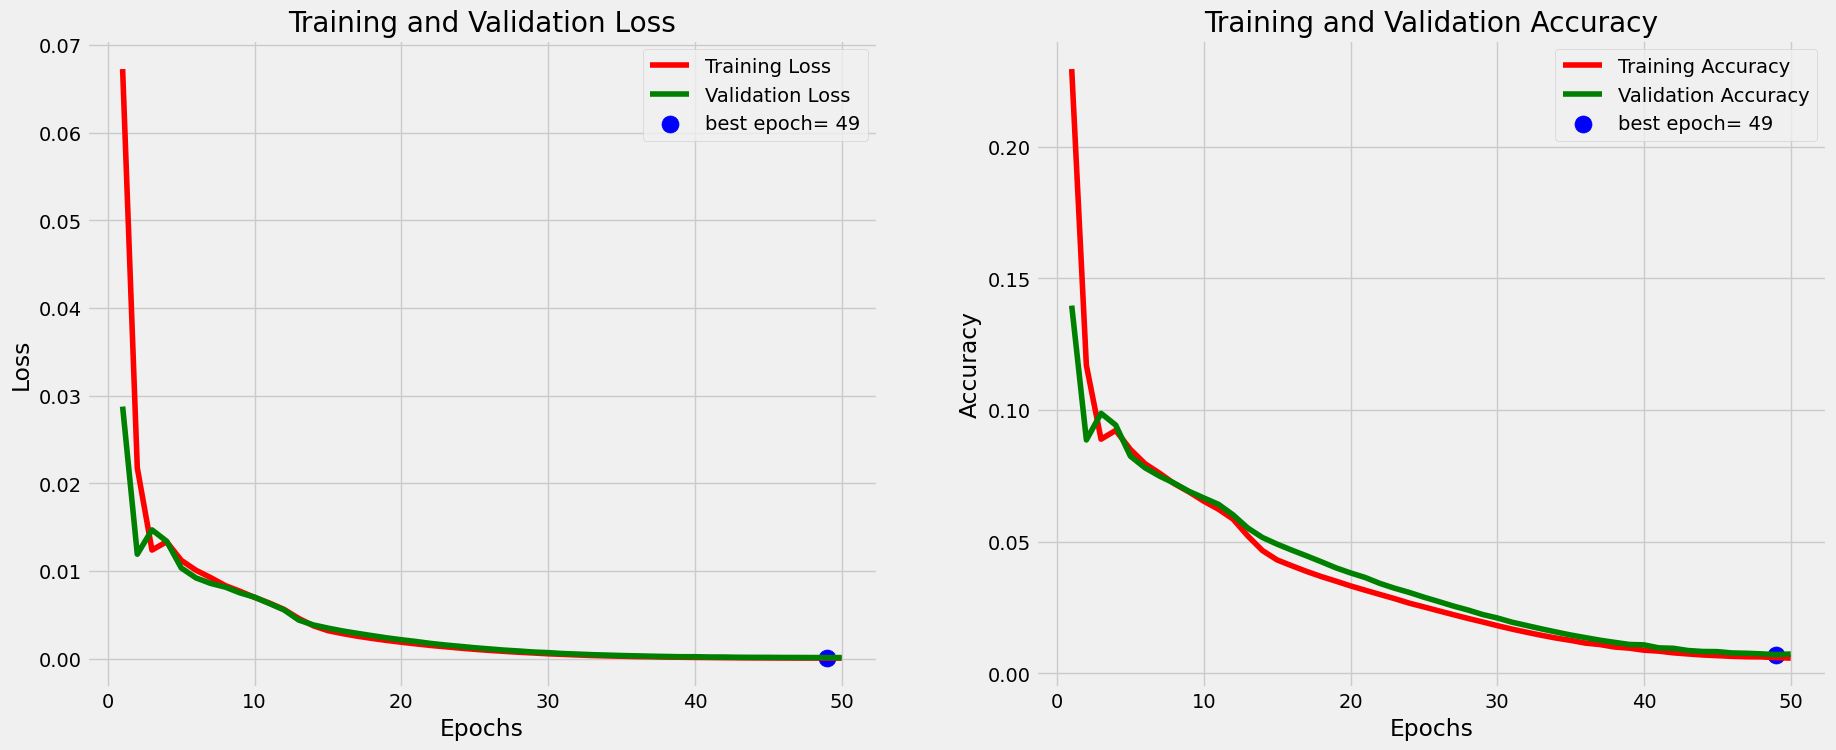

In [ ]:
# Akurasi dari model yang dilatih terhadap data training
tr_acc = history.history['mean_absolute_error']
# Kerugian yang dihasilkan selama proses pelatihan model pada data training
tr_loss = history.history['loss']
# Akurasi model yang dinilai terhadap data validasi
val_acc = history.history['val_mean_absolute_error']
# Kerugian pada data validasi selama proses pelatihan model
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training Loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

**Prediksi ANN**

In [20]:
# Menyimpan prediksi yang dihasilkan oleh model ANN
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


**Skor R2**

In [19]:
# Mencetak skor R2 untuk model ANN pada set pelatihan dan pengujian
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

R2 Score: 0.9999999791890545


**Evaluasi ANN**

In [ ]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 7.4885e-05 - mean_absolute_error: 0.0064


[7.488462870242074e-05, 0.00639540096744895]

**Prediksi ANN**

In [ ]:
# Mengevaluasi kinerja model ANN
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 53ms/step


array([[274939.12]], dtype=float32)

**Plotting Prediksi vs Hasil**

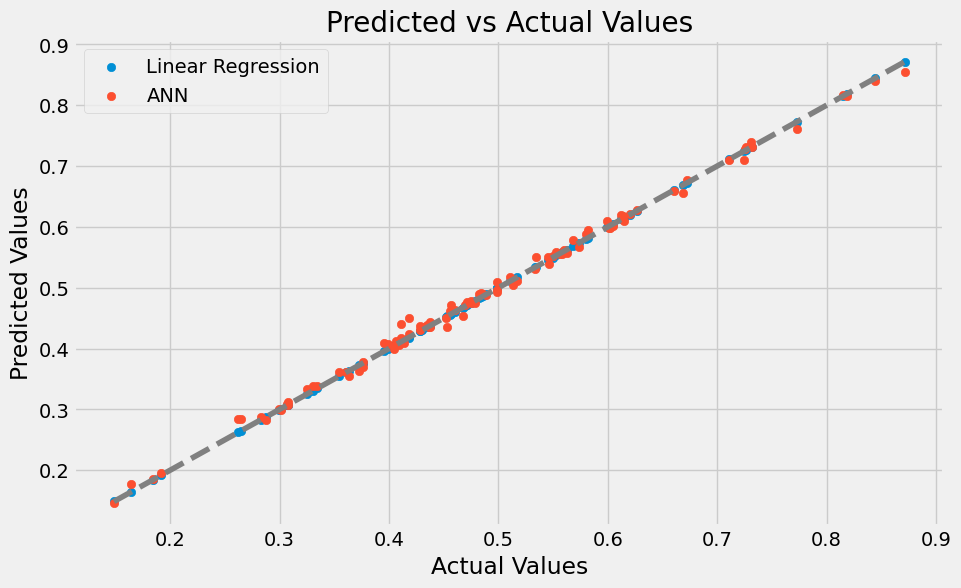

In [ ]:
# Membuat plot yang membandingkan nilai aktual dengan nilai yang diprediksi oleh model regresi linear dan model ANN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [5]:
y_pred = lreg.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

NameError: name 'lreg' is not defined